In [1]:
!pip install ipython-autotime
# !pip install -U scikit-learn
%load_ext autotime

time: 2.42 ms (started: 2021-01-24 16:21:15 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pwd
import os
os.chdir('/content/drive/My Drive/ML/ml-project-master/src/')
!pwd

/content
/content/drive/My Drive/ML/ml-project-master/src
time: 239 ms (started: 2021-01-23 11:04:32 +00:00)


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

from utility import *

time: 2.16 s (started: 2021-01-23 11:04:32 +00:00)


In [ ]:
import keras.backend as K


def euclidean_distance_loss(y_true, y_pred):
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

time: 14.6 ms (started: 2021-01-23 11:04:34 +00:00)


# Import Dataset

In [ ]:
def load_cup():
    ml_cup = np.delete(np.genfromtxt('ML-CUP20-TR.csv', 
                                     delimiter=','), obj=0, axis=1)
    return ml_cup[:, :-2], ml_cup[:, -2:]

def load_cup_blind():
    return np.delete(np.genfromtxt('ML-CUP20-TS.csv',
                                   delimiter=','), obj=0, axis=1)
    
def mean_euclidean_error(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return np.mean(np.linalg.norm(y_pred - y_true, axis=1))

time: 7.68 ms (started: 2021-01-23 11:04:34 +00:00)


In [ ]:
X, y = load_cup()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

time: 24.3 ms (started: 2021-01-23 11:04:34 +00:00)


In [ ]:
print(X.shape)
print(y.shape)

(1524, 10)
(1524, 2)
time: 2.13 ms (started: 2021-01-23 11:04:34 +00:00)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import L2

# Function to create model, required for KerasRegressor
def create_model(learn_rate=0.01, momentum=0.9, neurons_layer_1=130,
                 init_mode='uniform', activation='sigmoid',  weight_decay = 0.00001,
                 nesterov = True, neurons_layer_2 = 30):
  # create model
    model = Sequential()
    model.add(layers.InputLayer(input_shape=(10)))
    model.add(Dense(neurons_layer_1, activation=activation,
                    kernel_initializer=init_mode, kernel_regularizer= L2(weight_decay)))
    model.add(Dense(neurons_layer_2, activation=activation,
                    kernel_initializer=init_mode, kernel_regularizer= L2(weight_decay)))
    model.add(Dense(2))
    optimizer = SGD(
      learning_rate=learn_rate, momentum=momentum, nesterov=nesterov)
    # Compile model
    model.compile(optimizer=optimizer,
              loss=euclidean_distance_loss)
    return model

time: 14.6 ms (started: 2021-01-23 11:04:34 +00:00)


# Test v5

In [ ]:
model = create_model()
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs= 1000,
                    validation_data=(X_test, y_test),
                    verbose=2)

Epoch 1/1000
10/10 - 1s - loss: 56.1325 - val_loss: 50.7419
Epoch 2/1000
10/10 - 0s - loss: 48.0447 - val_loss: 38.9820
Epoch 3/1000
10/10 - 0s - loss: 33.1499 - val_loss: 22.6481
Epoch 4/1000
10/10 - 0s - loss: 20.1842 - val_loss: 17.1566
Epoch 5/1000
10/10 - 0s - loss: 16.9165 - val_loss: 16.8315
Epoch 6/1000
10/10 - 0s - loss: 16.8041 - val_loss: 16.9571
Epoch 7/1000
10/10 - 0s - loss: 16.7906 - val_loss: 16.7885
Epoch 8/1000
10/10 - 0s - loss: 16.6567 - val_loss: 16.6456
Epoch 9/1000
10/10 - 0s - loss: 16.5968 - val_loss: 16.5756
Epoch 10/1000
10/10 - 0s - loss: 16.5595 - val_loss: 16.5193
Epoch 11/1000
10/10 - 0s - loss: 16.5107 - val_loss: 16.4568
Epoch 12/1000
10/10 - 0s - loss: 16.4339 - val_loss: 16.3615
Epoch 13/1000
10/10 - 0s - loss: 16.3221 - val_loss: 16.2016
Epoch 14/1000
10/10 - 0s - loss: 16.1213 - val_loss: 15.8947
Epoch 15/1000
10/10 - 0s - loss: 15.7331 - val_loss: 15.2651
Epoch 16/1000
10/10 - 0s - loss: 14.9123 - val_loss: 13.9156
Epoch 17/1000
10/10 - 0s - loss: 

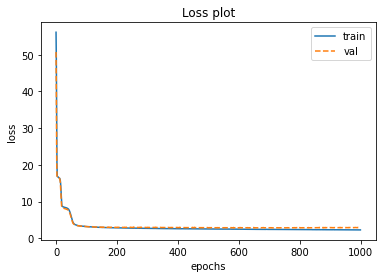

time: 192 ms (started: 2021-01-23 11:05:31 +00:00)


In [ ]:
plot_loss(history)

(100.0, 300.0)

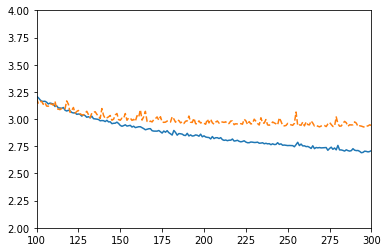

time: 188 ms (started: 2021-01-23 11:05:32 +00:00)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '--')
plt.ylim(2,4)
plt.xlim(100,300)

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
    0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.2716708|	0.00|
Test	|2.8985262|	0.00|
time: 2.35 ms (started: 2021-01-23 11:05:32 +00:00)


## Predict v5

In [ ]:
model = create_model()

history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs= 1000,
                    verbose=2)

Epoch 1/1000
10/10 - 0s - loss: 55.3696
Epoch 2/1000
10/10 - 0s - loss: 47.0644
Epoch 3/1000
10/10 - 0s - loss: 32.4776
Epoch 4/1000
10/10 - 0s - loss: 19.8935
Epoch 5/1000
10/10 - 0s - loss: 16.8038
Epoch 6/1000
10/10 - 0s - loss: 16.8312
Epoch 7/1000
10/10 - 0s - loss: 16.7436
Epoch 8/1000
10/10 - 0s - loss: 16.5939
Epoch 9/1000
10/10 - 0s - loss: 16.5243
Epoch 10/1000
10/10 - 0s - loss: 16.4450
Epoch 11/1000
10/10 - 0s - loss: 16.3406
Epoch 12/1000
10/10 - 0s - loss: 16.1734
Epoch 13/1000
10/10 - 0s - loss: 15.9113
Epoch 14/1000
10/10 - 0s - loss: 15.4015
Epoch 15/1000
10/10 - 0s - loss: 14.3806
Epoch 16/1000
10/10 - 0s - loss: 12.7312
Epoch 17/1000
10/10 - 0s - loss: 10.9311
Epoch 18/1000
10/10 - 0s - loss: 9.4717
Epoch 19/1000
10/10 - 0s - loss: 8.8422
Epoch 20/1000
10/10 - 0s - loss: 8.7159
Epoch 21/1000
10/10 - 0s - loss: 8.6535
Epoch 22/1000
10/10 - 0s - loss: 8.6153
Epoch 23/1000
10/10 - 0s - loss: 8.5602
Epoch 24/1000
10/10 - 0s - loss: 8.5281
Epoch 25/1000
10/10 - 0s - loss:

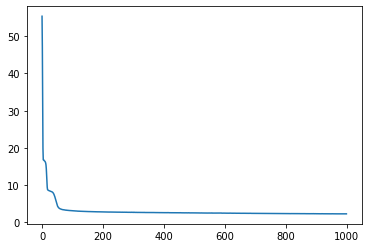

time: 168 ms (started: 2021-01-23 11:05:50 +00:00)


In [ ]:
plt.plot(history.history['loss'])

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    0,
    0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.3005960|	0.00|
Test	|0.0000000|	0.00|
time: 3.11 ms (started: 2021-01-23 11:05:50 +00:00)


In [ ]:
mean_euclidean_error(model.predict(X_test), y_test)

2.889871693051199

time: 126 ms (started: 2021-01-23 11:05:50 +00:00)


# Test v6

In [ ]:
model = create_model(momentum= 0.8)
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs= 1000,
                    validation_data=(X_test, y_test),
                    verbose=2)

Epoch 1/1000
20/20 - 0s - loss: 54.2935 - val_loss: 46.1348
Epoch 2/1000
20/20 - 0s - loss: 39.4449 - val_loss: 26.9529
Epoch 3/1000
20/20 - 0s - loss: 22.2770 - val_loss: 17.8517
Epoch 4/1000
20/20 - 0s - loss: 17.3353 - val_loss: 16.6590
Epoch 5/1000
20/20 - 0s - loss: 16.6722 - val_loss: 16.4668
Epoch 6/1000
20/20 - 0s - loss: 16.4440 - val_loss: 16.2991
Epoch 7/1000
20/20 - 0s - loss: 16.2057 - val_loss: 15.9691
Epoch 8/1000
20/20 - 0s - loss: 15.7106 - val_loss: 15.0774
Epoch 9/1000
20/20 - 0s - loss: 14.4997 - val_loss: 13.3201
Epoch 10/1000
20/20 - 0s - loss: 12.7010 - val_loss: 11.2803
Epoch 11/1000
20/20 - 0s - loss: 10.7970 - val_loss: 9.5550
Epoch 12/1000
20/20 - 0s - loss: 9.3011 - val_loss: 8.7942
Epoch 13/1000
20/20 - 0s - loss: 8.8070 - val_loss: 8.3735
Epoch 14/1000
20/20 - 0s - loss: 8.6631 - val_loss: 8.3072
Epoch 15/1000
20/20 - 0s - loss: 8.5954 - val_loss: 8.2690
Epoch 16/1000
20/20 - 0s - loss: 8.5535 - val_loss: 8.3172
Epoch 17/1000
20/20 - 0s - loss: 8.5475 - va

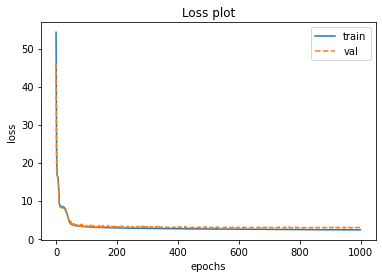

time: 193 ms (started: 2021-01-23 11:06:56 +00:00)


In [ ]:
plot_loss(history)

(100.0, 300.0)

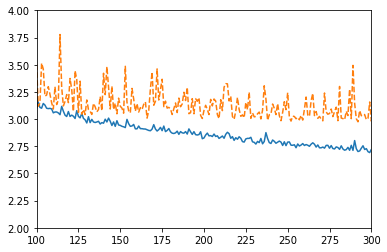

time: 194 ms (started: 2021-01-23 11:06:57 +00:00)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '--')
plt.ylim(2,4)
plt.xlim(100,300)

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
    0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.3284807|	0.00|
Test	|2.8837643|	0.00|
time: 2.74 ms (started: 2021-01-23 11:06:57 +00:00)


## Predict v6

In [ ]:
model = create_model()

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs= 1000,
                    verbose=2)

Epoch 1/1000
20/20 - 0s - loss: 47.4797
Epoch 2/1000
20/20 - 0s - loss: 20.9739
Epoch 3/1000
20/20 - 0s - loss: 16.9226
Epoch 4/1000
20/20 - 0s - loss: 16.6418
Epoch 5/1000
20/20 - 0s - loss: 16.5363
Epoch 6/1000
20/20 - 0s - loss: 16.3260
Epoch 7/1000
20/20 - 0s - loss: 15.7044
Epoch 8/1000
20/20 - 0s - loss: 13.6176
Epoch 9/1000
20/20 - 0s - loss: 10.5481
Epoch 10/1000
20/20 - 0s - loss: 8.8637
Epoch 11/1000
20/20 - 0s - loss: 8.6928
Epoch 12/1000
20/20 - 0s - loss: 8.6635
Epoch 13/1000
20/20 - 0s - loss: 8.5707
Epoch 14/1000
20/20 - 0s - loss: 8.5047
Epoch 15/1000
20/20 - 0s - loss: 8.4657
Epoch 16/1000
20/20 - 0s - loss: 8.4031
Epoch 17/1000
20/20 - 0s - loss: 8.3596
Epoch 18/1000
20/20 - 0s - loss: 8.2979
Epoch 19/1000
20/20 - 0s - loss: 8.2791
Epoch 20/1000
20/20 - 0s - loss: 8.1601
Epoch 21/1000
20/20 - 0s - loss: 8.0030
Epoch 22/1000
20/20 - 0s - loss: 7.7419
Epoch 23/1000
20/20 - 0s - loss: 7.3843
Epoch 24/1000
20/20 - 0s - loss: 6.8769
Epoch 25/1000
20/20 - 0s - loss: 6.2332


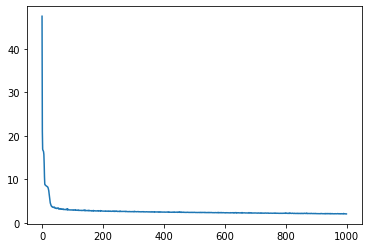

time: 162 ms (started: 2021-01-23 11:07:24 +00:00)


In [ ]:
plt.plot(history.history['loss'])

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    0,
    0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.0262933|	0.00|
Test	|0.0000000|	0.00|
time: 2.51 ms (started: 2021-01-23 11:07:24 +00:00)


In [ ]:
mean_euclidean_error(model.predict(X_test), y_test)

3.024964936546941

time: 78.7 ms (started: 2021-01-23 11:07:24 +00:00)


# Test v6 - 2°

In [ ]:
model = create_model(momentum= 0.8)
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs= 1000,
                    validation_data=(X_test, y_test),
                    verbose=2)

Epoch 1/1000
10/10 - 1s - loss: 56.4009 - val_loss: 51.9747
Epoch 2/1000
10/10 - 0s - loss: 51.0139 - val_loss: 45.3507
Epoch 3/1000
10/10 - 0s - loss: 43.2805 - val_loss: 36.2544
Epoch 4/1000
10/10 - 0s - loss: 33.5918 - val_loss: 26.6827
Epoch 5/1000
10/10 - 0s - loss: 24.8666 - val_loss: 20.7879
Epoch 6/1000
10/10 - 0s - loss: 20.2614 - val_loss: 18.3415
Epoch 7/1000
10/10 - 0s - loss: 18.2049 - val_loss: 17.2090
Epoch 8/1000
10/10 - 0s - loss: 17.2450 - val_loss: 16.7619
Epoch 9/1000
10/10 - 0s - loss: 16.8155 - val_loss: 16.5807
Epoch 10/1000
10/10 - 0s - loss: 16.6189 - val_loss: 16.4889
Epoch 11/1000
10/10 - 0s - loss: 16.5150 - val_loss: 16.4177
Epoch 12/1000
10/10 - 0s - loss: 16.4240 - val_loss: 16.3299
Epoch 13/1000
10/10 - 0s - loss: 16.3195 - val_loss: 16.2063
Epoch 14/1000
10/10 - 0s - loss: 16.1778 - val_loss: 16.0215
Epoch 15/1000
10/10 - 0s - loss: 15.9628 - val_loss: 15.7317
Epoch 16/1000
10/10 - 0s - loss: 15.6294 - val_loss: 15.2489
Epoch 17/1000
10/10 - 0s - loss: 

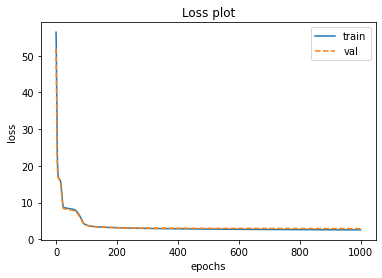

time: 198 ms (started: 2021-01-23 11:08:22 +00:00)


In [ ]:
plot_loss(history)

(100.0, 300.0)

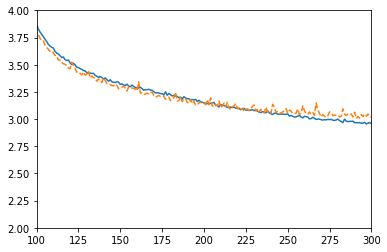

time: 190 ms (started: 2021-01-23 11:08:22 +00:00)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '--')
plt.ylim(2,4)
plt.xlim(100,300)

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
    0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.5571041|	0.00|
Test	|2.8858905|	0.00|
time: 3.93 ms (started: 2021-01-23 11:08:22 +00:00)


## Predict v6 - 2°

In [ ]:
model = create_model()

history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs= 1000,
                    verbose=2)

Epoch 1/1000
10/10 - 0s - loss: 54.3061
Epoch 2/1000
10/10 - 0s - loss: 43.9510
Epoch 3/1000
10/10 - 0s - loss: 26.9830
Epoch 4/1000
10/10 - 0s - loss: 17.9191
Epoch 5/1000
10/10 - 0s - loss: 16.7586
Epoch 6/1000
10/10 - 0s - loss: 16.8589
Epoch 7/1000
10/10 - 0s - loss: 16.6907
Epoch 8/1000
10/10 - 0s - loss: 16.5816
Epoch 9/1000
10/10 - 0s - loss: 16.5148
Epoch 10/1000
10/10 - 0s - loss: 16.4411
Epoch 11/1000
10/10 - 0s - loss: 16.3298
Epoch 12/1000
10/10 - 0s - loss: 16.1425
Epoch 13/1000
10/10 - 0s - loss: 15.8045
Epoch 14/1000
10/10 - 0s - loss: 15.0742
Epoch 15/1000
10/10 - 0s - loss: 13.7158
Epoch 16/1000
10/10 - 0s - loss: 12.1215
Epoch 17/1000
10/10 - 0s - loss: 10.5639
Epoch 18/1000
10/10 - 0s - loss: 9.4101
Epoch 19/1000
10/10 - 0s - loss: 8.8850
Epoch 20/1000
10/10 - 0s - loss: 8.6927
Epoch 21/1000
10/10 - 0s - loss: 8.6757
Epoch 22/1000
10/10 - 0s - loss: 8.6269
Epoch 23/1000
10/10 - 0s - loss: 8.5729
Epoch 24/1000
10/10 - 0s - loss: 8.5417
Epoch 25/1000
10/10 - 0s - loss:

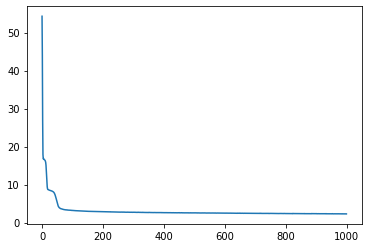

time: 164 ms (started: 2021-01-23 11:08:41 +00:00)


In [ ]:
plt.plot(history.history['loss'])

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    0,
    0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.2728355|	0.00|
Test	|0.0000000|	0.00|
time: 3.42 ms (started: 2021-01-23 11:08:41 +00:00)


In [ ]:
mean_euclidean_error(model.predict(X_test), y_test)

2.917013282229675

time: 78 ms (started: 2021-01-23 11:08:41 +00:00)


# Test v5 - FULL

In [ ]:
model = create_model(momentum= 0.9)
history = model.fit(X_train, y_train,
                    batch_size=len(X_train),
                    epochs= 10000,
                    validation_data=(X_test, y_test),
                    verbose=2)

Output streaming troncato alle ultime 5000 righe.
1/1 - 0s - loss: 2.3251 - val_loss: 2.8736
Epoch 7502/10000
1/1 - 0s - loss: 2.3261 - val_loss: 2.8529
Epoch 7503/10000
1/1 - 0s - loss: 2.3251 - val_loss: 2.8728
Epoch 7504/10000
1/1 - 0s - loss: 2.3256 - val_loss: 2.8527
Epoch 7505/10000
1/1 - 0s - loss: 2.3249 - val_loss: 2.8722
Epoch 7506/10000
1/1 - 0s - loss: 2.3251 - val_loss: 2.8525
Epoch 7507/10000
1/1 - 0s - loss: 2.3246 - val_loss: 2.8716
Epoch 7508/10000
1/1 - 0s - loss: 2.3246 - val_loss: 2.8525
Epoch 7509/10000
1/1 - 0s - loss: 2.3241 - val_loss: 2.8712
Epoch 7510/10000
1/1 - 0s - loss: 2.3241 - val_loss: 2.8527
Epoch 7511/10000
1/1 - 0s - loss: 2.3235 - val_loss: 2.8709
Epoch 7512/10000
1/1 - 0s - loss: 2.3235 - val_loss: 2.8531
Epoch 7513/10000
1/1 - 0s - loss: 2.3227 - val_loss: 2.8708
Epoch 7514/10000
1/1 - 0s - loss: 2.3229 - val_loss: 2.8535
Epoch 7515/10000
1/1 - 0s - loss: 2.3221 - val_loss: 2.8709
Epoch 7516/10000
1/1 - 0s - loss: 2.3225 - val_loss: 2.8538
Epoch 7

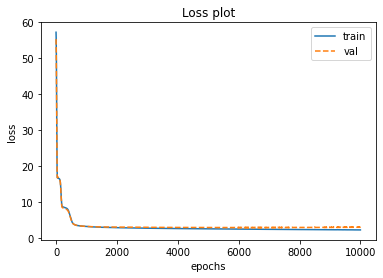

time: 193 ms (started: 2021-01-23 11:27:05 +00:00)


In [ ]:
plot_loss(history)

KeyError: ignored

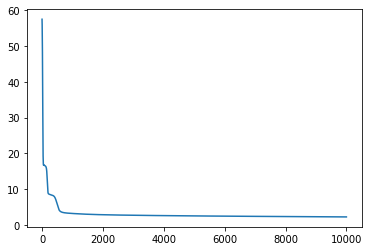

time: 192 ms (started: 2021-01-23 11:32:29 +00:00)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '--')
plt.ylim(2,4)
plt.xlim(1000,3000)

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
    0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.1850023|	0.00|
Test	|2.9353304|	0.00|
time: 2.83 ms (started: 2021-01-23 11:27:06 +00:00)


## Predict v5 - FULL

In [ ]:
model = create_model(momentum= 0.9)

history = model.fit(X_train, y_train,
                    batch_size=len(X_train),
                    epochs= 10000,
                    verbose=2)

Output streaming troncato alle ultime 5000 righe.
1/1 - 0s - loss: 2.3589
Epoch 7502/10000
1/1 - 0s - loss: 2.3589
Epoch 7503/10000
1/1 - 0s - loss: 2.3588
Epoch 7504/10000
1/1 - 0s - loss: 2.3587
Epoch 7505/10000
1/1 - 0s - loss: 2.3586
Epoch 7506/10000
1/1 - 0s - loss: 2.3585
Epoch 7507/10000
1/1 - 0s - loss: 2.3584
Epoch 7508/10000
1/1 - 0s - loss: 2.3582
Epoch 7509/10000
1/1 - 0s - loss: 2.3581
Epoch 7510/10000
1/1 - 0s - loss: 2.3579
Epoch 7511/10000
1/1 - 0s - loss: 2.3578
Epoch 7512/10000
1/1 - 0s - loss: 2.3575
Epoch 7513/10000
1/1 - 0s - loss: 2.3574
Epoch 7514/10000
1/1 - 0s - loss: 2.3573
Epoch 7515/10000
1/1 - 0s - loss: 2.3572
Epoch 7516/10000
1/1 - 0s - loss: 2.3571
Epoch 7517/10000
1/1 - 0s - loss: 2.3570
Epoch 7518/10000
1/1 - 0s - loss: 2.3569
Epoch 7519/10000
1/1 - 0s - loss: 2.3569
Epoch 7520/10000
1/1 - 0s - loss: 2.3568
Epoch 7521/10000
1/1 - 0s - loss: 2.3568
Epoch 7522/10000
1/1 - 0s - loss: 2.3567
Epoch 7523/10000
1/1 - 0s - loss: 2.3567
Epoch 7524/10000
1/1 - 0

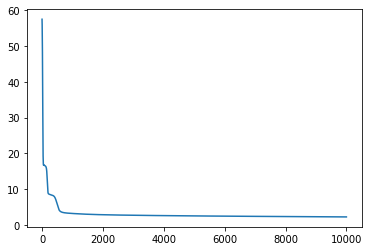

time: 167 ms (started: 2021-01-23 11:29:03 +00:00)


In [ ]:
plt.plot(history.history['loss'])

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    0,
    0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.2300401|	0.00|
Test	|0.0000000|	0.00|
time: 2.85 ms (started: 2021-01-23 11:29:03 +00:00)


In [ ]:
mean_euclidean_error(model.predict(X_test), y_test)

2.976644137271975

time: 85.2 ms (started: 2021-01-23 11:29:03 +00:00)
